In [1]:
#use logistics regression + SGD Classifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer

In [2]:
load_breast_cancer

<function sklearn.datasets._base.load_breast_cancer>

In [3]:
cancer = load_breast_cancer()
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [ ]:
print(cancer.DESCR)

In [4]:
#create data frame in order to manage the cancer data properly
cancer_df = pd.DataFrame(cancer.data,columns = cancer.feature_names)

In [5]:
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
x = np.array(cancer.data)
y = np.array(cancer.target)
print(y.shape)
print(x.shape)

(569,)
(569, 30)


In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[1.532e+01 1.727e+01 1.032e+02 ... 2.229e-01 3.258e-01 1.191e-01]
 [1.189e+01 1.736e+01 7.620e+01 ... 8.946e-02 2.220e-01 6.033e-02]
 [9.667e+00 1.849e+01 6.149e+01 ... 6.560e-02 3.174e-01 8.524e-02]
 ...
 [8.618e+00 1.179e+01 5.434e+01 ... 4.419e-02 3.220e-01 9.026e-02]
 [1.160e+01 2.449e+01 7.423e+01 ... 4.815e-02 3.244e-01 6.745e-02]
 [2.031e+01 2.706e+01 1.329e+02 ... 1.697e-01 3.151e-01 7.999e-02]]
[[1.220e+01 1.521e+01 7.801e+01 ... 5.556e-02 2.661e-01 7.961e-02]
 [1.386e+01 1.693e+01 9.096e+01 ... 1.654e-01 3.630e-01 1.059e-01]
 [8.598e+00 2.098e+01 5.466e+01 ... 2.778e-02 2.972e-01 7.712e-02]
 ...
 [1.549e+01 1.997e+01 1.024e+02 ... 2.121e-01 3.187e-01 1.019e-01]
 [1.060e+01 1.895e+01 6.928e+01 ... 7.926e-02 2.940e-01 7.587e-02]
 [1.314e+01 2.074e+01 8.598e+01 ... 1.181e-01 2.563e-01 8.174e-02]]
[0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [10]:
model = LogisticRegression(solver= 'liblinear',random_state =0)
model.fit(x_train,y_train)

LogisticRegression(C=100.0, class_weight = None, dual=False, fit_intercept = True, 
                   intercept_scaling=1,l1_ratio=None, max_iter = 100, multi_class = 'auto',
                   n_jobs=None, penalty='l2', random_state=0, solver='liblinear',tol = 0.0001,verbose=0,
                   warm_start=False)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
model.classes_

array([0, 1])

In [12]:
print('intercept',model.intercept_)
print('slope',model.coef_)


intercept [0.24741658]
slope [[-0.23424164 -0.62352205 -0.2655799  -0.3825971  -0.16446382  0.58439706
  -0.93584501 -0.86984013  0.13607887  0.39753779 -1.04816464  0.24626634
  -0.75863562 -0.87550763 -0.28305423  0.62295416  0.25893649 -0.32377104
   0.08539077  0.52176606 -0.75384532 -1.00231579 -0.767679   -0.80642645
  -0.55656379  0.04540645 -0.77588377 -0.91214114 -0.75802503 -0.55104579]]


In [13]:
model.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [14]:
y_test

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1])

To be honest, im not sure why the score is soo high from the first Logisitc Regression Model XD

In [15]:
model.score(x_test,y_test)

0.972027972027972

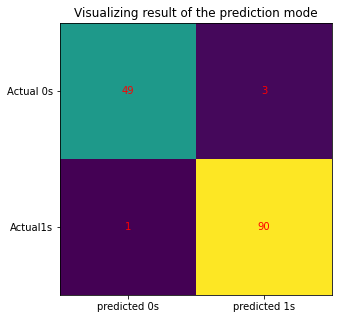

In [16]:
cm = confusion_matrix(y_test,model.predict(x_test))

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('predicted 0s','predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual1s'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
  for j in range(2):
    ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.title("Visualizing result of the prediction mode")
plt.show()

In [17]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        52
           1       0.97      0.99      0.98        91

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [18]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss = 'log',max_iter = 1000, alpha = 0.001)
clf.fit (x_train,y_train)
y_pred = clf.predict(x_test)
print('coef', clf.coef_)
print('intercept', clf.intercept_)
print('score', clf.score(x_test,y_test))


coef [[-0.19091965 -0.45036522 -0.28446465 -0.27173337 -0.4633124   1.06766698
  -1.45906422 -1.01206932  0.41636062  0.86406639 -1.52588848  0.4981305
  -0.96894834 -1.39967358 -0.86607774  0.21585543  0.79179641 -0.71946464
  -0.10463939  0.91357783 -0.93700865 -1.57018222 -1.03818286 -0.90097216
  -0.46211028 -0.12178273 -1.14929799 -1.11925139 -1.17664535 -1.26122075]]
intercept [0.12527423]
score 0.972027972027972


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

parameters = {'loss':('log','hinge'),'penalty':('l1','l2','elasticnet'),
              'alpha':[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1], 'max_iter':[5000,1000,2000]}
              
model2 = SGDClassifier(random_state = 0)
clf = GridSearchCV(model2,parameters)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5, random_state=0,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ('log', 'hinge'),
                         'max_iter': [5000, 1000, 2000],
                      

In [ ]:
clf.best_params_

{'alpha': 0.001, 'loss': 'hinge', 'max_iter': 5000, 'penalty': 'l1'}

In [ ]:
clf.best_estimator_.intercept_

array([209.49574955])

In [ ]:
clf.best_estimator_.coef_

array([[ 1.59096519e+03,  2.38452166e+03,  9.33960046e+03,
         4.47281641e+03,  1.08704451e+01, -1.21727366e+00,
        -2.17606772e+01, -7.28544256e+00,  2.34480729e+01,
         7.37578812e+00,  5.35810054e+00,  1.83298521e+02,
        -7.26995608e+00, -3.67703473e+03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.66070507e+03,
         2.96512514e+03,  9.37994232e+03, -5.96077609e+03,
         1.51130793e+01, -2.33379894e+01, -4.86393158e+01,
        -8.56325191e+00,  3.11552172e+01,  6.51828590e+00]])

Score dropped to 0.906, but its the highest found by the GridSearchCV lmao XD (gotta ask about this)

In [20]:
clf.best_score_

0.9859097127222982